In [1]:
import numpy as np
import matplotlib.pyplot as plt
import barak as bk
%matplotlib inline

In [2]:
def nfw_mass(x,c):
    A = np.log(1.0+c)-(c/(c+1))
    M = np.log(1.0+x*c)- (x*c/(x*c+1))
    return M/A

In [3]:
def conc_from_mass(M):
    conc = 9.7 * (M/(1.0E12/0.7))**(-0.074)
    return conc

In [4]:
x = np.logspace(-3,0)
c = 10.0
m = nfw_mass(x, c)

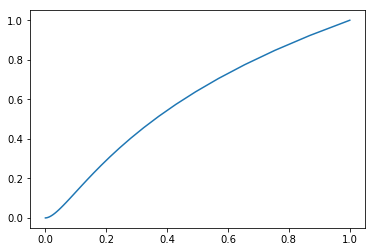

In [5]:
plt.plot(x, m)

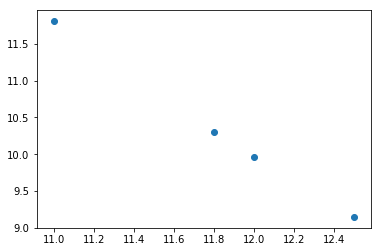

In [8]:
from astropy.constants import G, M_sun, kpc, k_B, m_p
from astropy.cosmology import default_cosmology
from barak import virial
z = 0.0
mass = np.array([10**11.0, 10**11.8, 10**12.0, 10**12.5])
n_points = len(mass)
conc = conc_from_mass(mass)
mu = 0.59
#km = 1e5
cosmo = default_cosmology.get()
rho_virial = virial.deltavir(z, cosmo=cosmo) * cosmo.critical_density(z) 
M_g = mass * M_sun.cgs
rvir = ((3 * M_g) / (4 * np.pi * rho_virial))**(1./3)
#print(rvir.to('kpc'))
vcirc = np.sqrt(G.cgs * M_g / rvir)
#print vcirc.to('km/s')
Tvir = mu * m_p.cgs * vcirc * vcirc / (2 * k_B.cgs)
#print(Tvir.to('Kelvin'))
plt.scatter(np.log10(mass), conc)

$10^{{11.0}}\ M_{\odot}$
$10^{{11.8}}\ M_{\odot}$
$10^{{12.0}}\ M_{\odot}$
$10^{{12.5}}\ M_{\odot}$


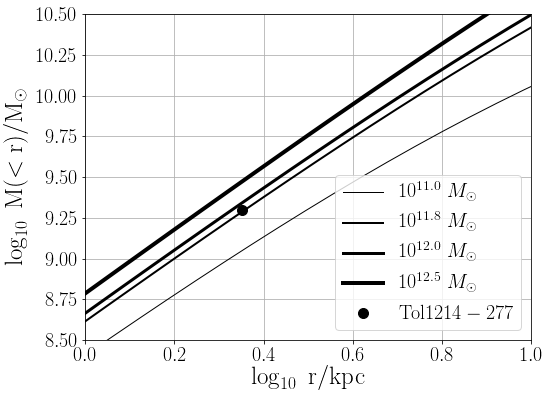

In [10]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=20)
for i in range(n_points):
    x = np.logspace(-3,0)
    c = conc_from_mass(mass[i])
    m = nfw_mass(x, c)
    r = rvir.to('kpc')[i]
    masa = r'$10^{{'+str(np.log10(mass[i]))+'}}\ M_{\odot}$'
    print(masa)
    plt.plot(np.log10(x*r.value),np.log10(m*mass[i]), color='black', label=masa, linewidth=i+1)

r_tol = 2.25
m_tol = 2E9
plt.scatter(np.log10(r_tol), np.log10(m_tol), label=r"${\rm{Tol} 1214-277}$", s=100, alpha=1.0, color='black')
#plt.arrow(np.log10(r_tol), np.log10(m_tol), 
#         0,0.2, head_width=0.02, head_length=0.1, fc='k', ec='k')
plt.grid()
plt.xlim([0,1.0])
plt.ylim([8.5,10.5])
plt.legend(loc=4)
plt.xlabel(r"$\log_{10}\ {\mathrm{r/kpc}}$", fontsize=25)
plt.ylabel(r"$\log_{10}\ {\mathrm{M(<r)/M_{\odot}}}$", fontsize=25)
plt.savefig("../paper/enclosed_mass.pdf", bbox_inches='tight')


In [7]:
10**11.8/1E11

6.309573444801943

In [49]:
type(a.value)

float